# Исследование данных развлекательного приложения Procrastinate Pro+

В нашем распоряжении данные развлекательного приложения Procrastinate Pro+ о пользователях, их посещениях и покупках, а также о рекламных расходах. Нужно проанализировать данные и понять, по какой причине компания терпит убытки, и помочь это исправить.


**Цель исследования:**


1. Узнать, окупается ли реклама 
2. Выявить причины неэффективности пользователей


**Ход исследования:**


   Данные о визитах пользователей я получу из файла `/datasets/visits_info_short.csv`, о заказах - из `/datasets/orders_info_short.csv`, о рекламных расходах - из `/datasets/costs_info_short.csv`. В данных могут быть ошибки, поэтому предварительно я займусь предобработкой данных, чтобы быть уверенной в том, что ошибки не повлияют на ход анализа. Если же я пойму, что ошибки критичны, я исправлю их там, где это будет возможно. Для ясности и лаконичности кода введу несколько функций, которые потребуются в ходе анализа. Затем я приступлю к исследовательскому анализу, составлю профили пользователей, проанализирую данные о рекламе, чтобы оценить ее окупаемость.
   В итоге, мое исследование пройдет в 6 этапов:

   - Загрузка данных
   - Предобработка данных
   - Введение функций
   - Исследовательский анализ данных
   - Маркетинг
   - Оценка окупаемости рекламы
   - Общий вывод

## Загрузка данных

Первым делом импортируем библиотеки *pandas*, *matplotlib*, *numpy*, и *seaborn*. Сохраним датасеты и выведем на экран первые 5 строк каждого из них, чтобы посмотреть на содержимое:

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

In [212]:
try:
    visits = pd.read_csv('jupyter_projects/visits_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')

In [213]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [214]:
try:
    orders = pd.read_csv('jupyter_projects/orders_info_short.csv')
except:
    orders = pd.read_csv('/datasets/orders_info_short.csv')

In [215]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [216]:
try:
    costs = pd.read_csv('jupyter_projects/costs_info_short.csv')
except:
    costs = pd.read_csv('/datasets/costs_info_short.csv')

In [217]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Теперь изучим общую информацию о датасетах:

In [219]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Приятно, ни одного пропуска! Только вот с типами данных двух последних столбцов надо будет поработать.

In [221]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Аналогичная ситуация с датой события - потребуется изменить тип данных.

In [223]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Тоже потребуется обработка типа данных в столбце `dt`. Кроме того, для удобства потребуется привести все названия столбцов в датасетах к нижнему регистру.

## Предобработка данных

### Обработка названий столбцов

Приведем все названия столбцов к нижнему регистру с помощью метода `str.lower()`:

In [228]:
visits.columns = visits.columns.str.lower()

In [229]:
orders.columns = orders.columns.str.lower()

In [230]:
costs.columns = costs.columns.str.lower()

Теперь работать с датафреймами будет приятнее. Осталось только заменить пробелы в названиях на нижние подчеркивания:

In [232]:
visits.columns = visits.columns.str.replace(' ', '_')

In [233]:
orders.columns = orders.columns.str.replace(' ', '_')

In [234]:
costs.columns = costs.columns.str.replace(' ', '_')

### Обработка дубликатов

Для начала отыщем явные дубликаты, если таковые имеются:

In [237]:
visits.duplicated().sum()

0

In [238]:
orders.duplicated().sum()

0

In [239]:
costs.duplicated().sum()

0

Теперь посмотрим на неявные дубликаты:

In [241]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [242]:
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [243]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Что ж, все значения в тех столбцах, в которых могли быть найдены дубликаты, уникальны. Данные чистые, что вполне ожидаемо, ведь они собираются автоматически, поэтому ошибки в написании названий девайсов/источников маловероятны. 

### Обработка типов данных

Начнем с датафрейма `visits` - в нем потребуется изменить тип данных старта и окончания сессии на `datetime`:

In [247]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

Аналогично поступим с датой события в `orders`:

In [249]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

Осталось обработать `dt` в датафрейме `costs`:

In [251]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

## Задание функций

Зададим функции для создания профилей, подсчёта удержания, конверсии, LTV и ROI:

In [254]:
# функция для создания профилей

def get_profiles(sessions, orders, ad_costs):

    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')

    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [255]:
# функция для подсчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    dimensions = ['payer'] + dimensions

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - dt.timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем таблицы удержания и динамики удержания и сырые данные
    return result_raw, result_grouped, result_in_time

In [256]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - dt.timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    if 'cohort' in dimensions: 
        dimensions = []

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем таблицы конверсии и динамики конверсии и сырые данные
    return result_raw, result_grouped, result_in_time

In [257]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - dt.timedelta(
            days=horizon_days - 1
        )
        
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )

        result = result.fillna(0).cumsum(axis=1)
        
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes

        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        roi = result.div(cac['cac'], axis=0)

        roi = roi[~roi['cohort_size'].isin([np.inf])]

        roi['cohort_size'] = cohort_sizes

        roi['cac'] = cac['cac']

        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    if 'cohort' in dimensions:
        dimensions = []

    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

А также зададим функции для создания графиков:

In [259]:
# функция для сглаживания фрейма

def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [260]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(15, 10))

    retention = retention.drop(columns=['cohort_size', 0])

    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    ax3 = plt.subplot(2, 2, 3)
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]

    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [261]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 5))

    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [262]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    cac_history = roi_history[['cac']]

    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

### Создание профилей пользователей

Создадим профили с помощью ранее введенной функции `get_profiles`. Для наглядности выведем первые 5 строк нового датафрейма:

In [266]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Найдем минимальную и максимальную даты привлечения пользователей в исследуемых данных:

In [268]:
min_dt = profiles['dt'].min()
max_dt = profiles['dt'].max()
print('Минимальная дата привлеченеия: {}'.format(min_dt))
print('Максимальная дата привлеченеия: {}'.format(max_dt))

Минимальная дата привлеченеия: 2019-05-01
Максимальная дата привлеченеия: 2019-10-27


Данные в датафрейме предоставлены с 1 мая по 27 октября 2019 года, как и сказано в выданном задании, все сходится.

### Распределение по странам

Теперь создадим сводную таблицу с данными о платящих и неплатящих пользователях в разбивке по странам, узнаем, в каком регионе приложение пользуется наибольшей популярностью:

In [272]:
region_group = profiles.groupby('region').agg({'user_id':'nunique'})
region_group['payers'] = profiles.query('payer == True').groupby('region').agg({'user_id':'nunique'})
region_group['payer_percentage'] = region_group['payers'] / region_group['user_id'] * 100
region_group = region_group.sort_values(by='payer_percentage', ascending=False).reset_index()
region_group

,region,user_id,payers,payer_percentage
0,United States,100002,6902,6.901862
1,Germany,14981,616,4.111875
2,UK,17575,700,3.982930
3,France,17450,663,3.799427


**Вывод:** Приложением пользуются в США, Германии, Великобритании и Франции. Наибольшее количество пользователей приходит из США - `100002`, наименьшее из Германии - `14981`. Наибольшее количество платящих пользователей тоже в США - `6902`, наименьшее в Германии - `616`. Несмотря на то, что в Германии наименьшее количество пользователей, доля платящих среди них `4.1%`, в этом плане Германия уступает лишь Соединенным Штатам, где доля платящих `6.9%`. 

### Распределение по устройствам

Теперь проделаем аналогичное, но с разбивкой по устройствам, с которых пользователи заходят в приложение:

In [276]:
device_group = profiles.groupby('device').agg({'user_id':'nunique'})
device_group['payers'] = profiles.query('payer == True').groupby('device').agg({'user_id':'nunique'})
device_group['payer_percentage'] = device_group['payers'] / device_group['user_id'] * 100
device_group = device_group.sort_values(by='payer_percentage', ascending=False).reset_index()
device_group

,device,user_id,payers,payer_percentage
0,Mac,30042,1912,6.364423
1,iPhone,54479,3382,6.207897
2,Android,35032,2050,5.851793
3,PC,30455,1537,5.046790


**Вывод:** Наибольшее количество пользователей заходит в приложение через IPhone - `54479`, наименьшее - `30042` - через Mac. Платящие пользователи также предпочитают IPhone, их аж `3382`, что в 2 раза больше, чем платящих пользователей на PC. Однако максимальная доля платящих пользователей в разбивке по устройствам приходится именно на Mac - `6.4%` от всех пользователей приложения на Mac. PC поигрывает по всем параметрам, кроме общего количества пользователей, на Mac их все же немного меньше. Но в целом, доля платящих пользователей вырьируется от 5 до 6.4 процентов, то есть почти одинакова вне зависимости от устройства.

### Распределение по каналам привлечения

Теперь исследуем пользователей, привлеченных из разных источников:

In [280]:
channel_group = profiles.groupby('channel').agg({'user_id':'nunique'})
channel_group['payers'] = profiles.query('payer == True').groupby('channel').agg({'user_id':'nunique'})
channel_group['payer_percentage'] = channel_group['payers'] / channel_group['user_id'] * 100
channel_group = channel_group.sort_values(by='payer_percentage', ascending=False).reset_index()
channel_group

,channel,user_id,payers,payer_percentage
0,FaceBoom,29144,3557,12.204914
1,AdNonSense,3880,440,11.340206
2,lambdaMediaAds,2149,225,10.469986
3,TipTop,19561,1878,9.600736
4,RocketSuperAds,4448,352,7.913669
5,WahooNetBanner,8553,453,5.296387
6,YRabbit,4312,165,3.826531
7,MediaTornado,4364,156,3.574702
8,LeapBob,8553,262,3.063253
9,OppleCreativeMedia,8605,233,2.707728


**Вывод:** Больше всего пользователей зашло в приложение без какой-либо рекламы, то есть наткнулись на Procrastinate Pro+ естественным путем, таких `56439` человек. Правда платящих среди них всего около 1000, и доля `2%`. Наименее эффективный источник привлечения - lambdaMediaAds, оттуда пришло всего 2000 пользователей, зато доля платящих среди них - `10.5%`. Этот показатель не сильно отстает от максимальных `12.2%` платящих пользователей в FaceBoom. Этот источник также лидирует по количеству привлеченных пользователей после organic - `29144` человека. Третий по этому параметру источник - TipTop. Остальные каналы оказались не так эффективны по привлечению, но вот доля платящих `11.3%` приходится на AdNonSense, это второе место.

## Маркетинг

### Расходы на рекламу

Посчитаем общую сумму расходов на маркетинг:

In [285]:
print(f'Общая сумма расходов на маркетинг: {round(costs["costs"].sum(), 2)}')

Общая сумма расходов на маркетинг: 105497.3


Теперь посмотрим, как вложения в рекламу распределены по каналам:

In [287]:
costs_channels = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)
costs_channels['percentage'] = costs_channels['costs'] / costs['costs'].sum() * 100
costs_channels.round(2)

,costs,percentage
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


**Вывод:** Рекордные суммы денег потратили на `TipTop` и `FaceBoom` - 55 и 33 тысячи соответственно. В ТипТоп была вложена половина всех денег, отданных на рекламу. Причем судя по нашему предыдущему исследованию, фэйсбум - явный лидер по привлечению пользователей, типтоп привлек на 10 тысяч меньше человек, а денег в рекламу было вложено чуть ли не в 2 раза больше. 

### Визуализация расходов на рекламу

Добавим в датафрейм `costs` столбцы с номерами недели и месяца:

In [291]:
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

In [292]:
costs['month'] = pd.DatetimeIndex(costs['dt']).month

Теперь построим график, отображающий динамику изменения расходов во времени по неделям по каждому источнику, а затем - отображающий динамику изменения расходов во времени по месяцам по каждому источнику. Для удобства напишем функцию:

In [294]:
def line_plot(period, xlabel, ylim=None):
    ax = plt.gca()
    legend = []

    for channel in costs['channel'].unique():
        legend.append(channel)
        data_plot = costs.query('channel == @channel')
        data_plot.groupby(period)['costs'].sum().plot(x=period, y='costs', ylim = ylim,
                                                      style='o-', kind='line', ax=ax, figsize=(15,4))

    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel('затраты')
    ax.set_title(f'затраты на рекламу по временному периоду: {xlabel}')
    ax.legend(legend, prop={'size': 8}, loc='upper left')
    return plt.show()

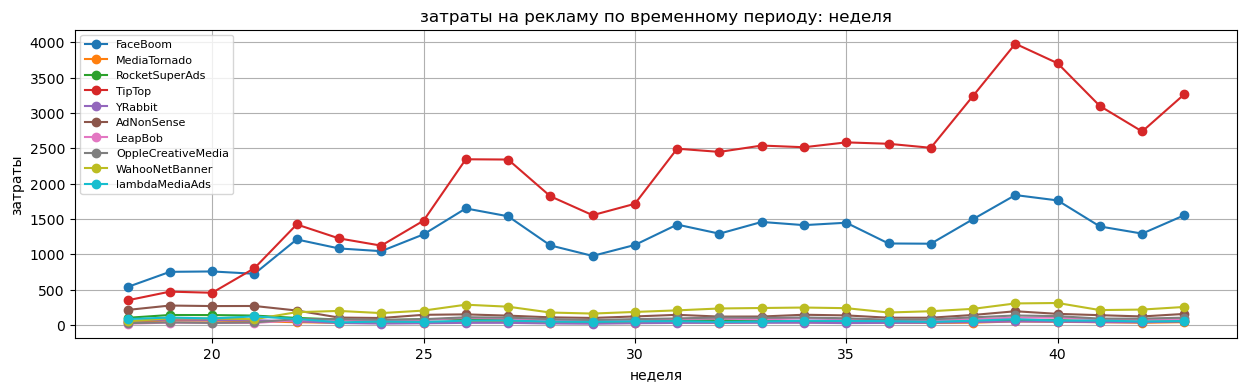

In [295]:
line_plot('week', 'неделя')

Тяжело рассмотреть, что происходит с компаниями, затраты на рекламу у которых составляли не более 300 рублей в неделю, построим еще график:

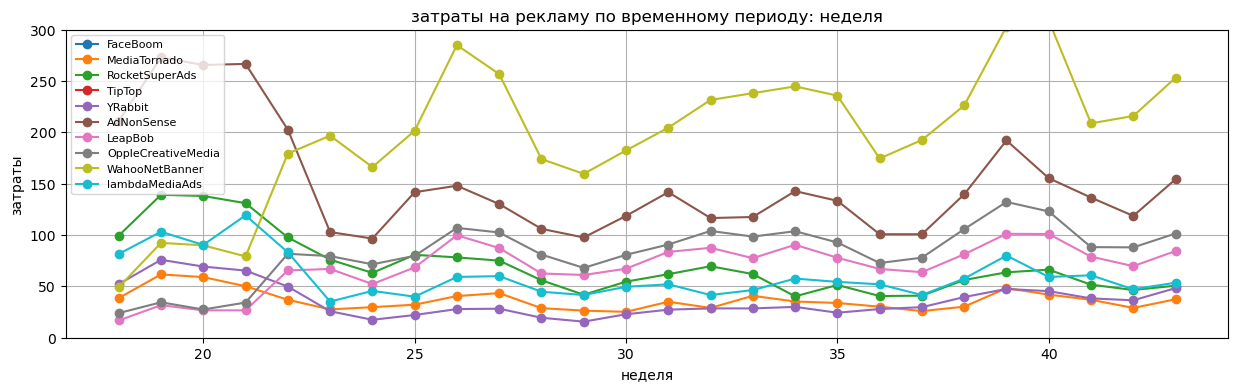

In [297]:
line_plot('week', 'неделя', ylim=(0, 300))

**Вывод:** Что ж, такая визуализация тоже не сильно что-то изменила, в среднем затраты на рекламу в каждом канале одинаковы с течением времени. Но у нас есть явные лидеры по вложениям - `FaceBoom` и `TipTop`. Затраты на их рекламу росли с каждой неделей, примерно на 39-ой неделе затраты в каждой компании достигли пика, а затем начали падать, но к 43-й неделе снова выросли. Посмотрим на аналогичные визуализации, но в разрезе месяцев:

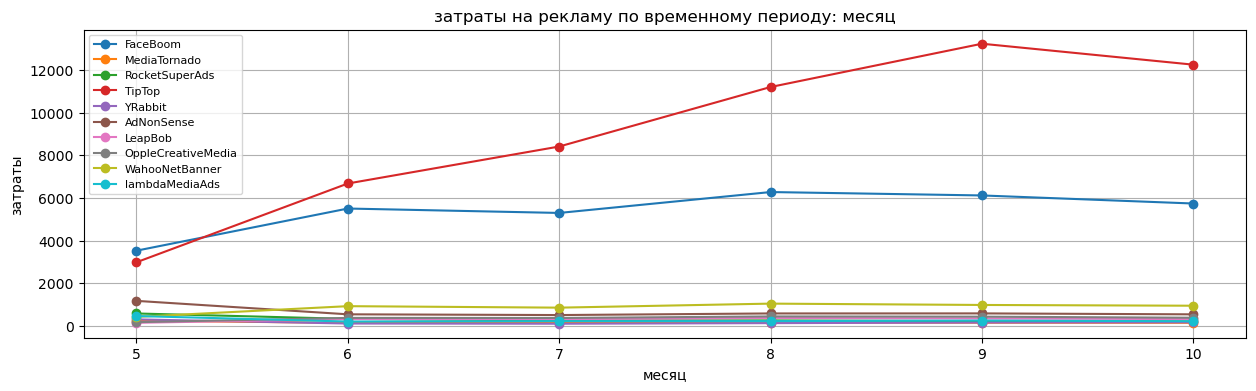

In [299]:
line_plot('month', 'месяц')

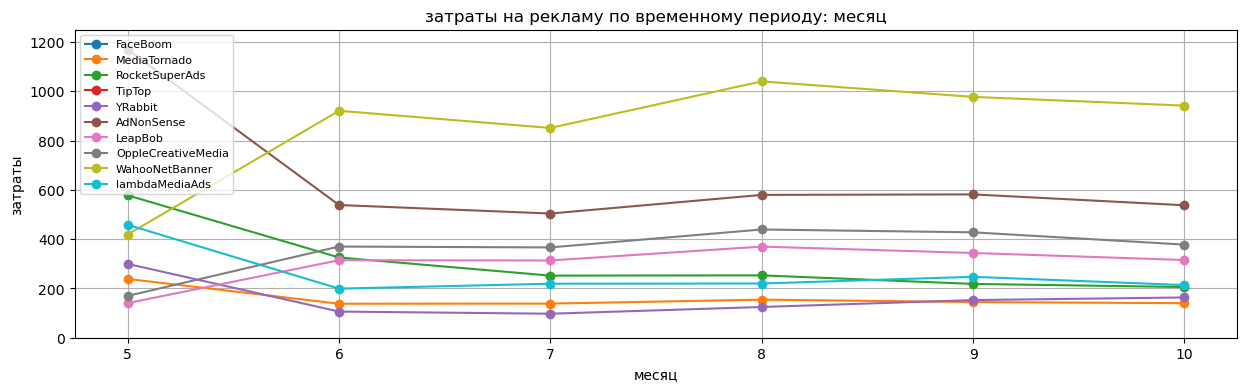

In [300]:
line_plot('month', 'месяц', ylim=(0, 1250))

**Вывод:** Интересно, что компания `AdNonSense` еще в мае получила 1200 на рекламу, а уже в июне - всего 600. Хотя доля платящих клиентов среди общего числа пользователей, привлеченных по этому каналу, составляет 11% и занимает второе место по этому параметру среди всех остальных компаний. Однако общее число привлеченных пользователей все равно чуть ли не самое маленькое. Общий вывод, который мы можем сделать по этим данным - затраты на две лидирующие компании достигали в сумме 6000 рублей в неделю, остальняе рекламные кампании обходились не более, чем в 300 рублей в неделю по каждому каналу.

### Расчет САС

In [303]:
profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(
    by='acquisition_cost', ascending=False).style.format({'acquisition_cost': '{:.2f}'})

,acquisition_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


**Вывод:** Привлечение одного пользователя в `TipTop` обошлось не дешево - в 2.8 рубля, а это более, чем в 2 раза превышает среднюю стоимость привлечения пользователя в следующих по "дороговизне" компаниях - в `FaceBoom` и `AdNonSense`. Денежные вложения в пользователя в остальных каналах в 4-13 раз меньше.

## Оценка окупаемости рекламы

### LTV и ROI

Для начала зададим момент и горизонт анализа:

In [308]:
observation_date = dt.datetime(2019, 11, 1).date()
horizon_days = 14

Органическая реклама нам не особо интересна для расчетов LTV и ROI, так что создадим таблицу без таких пользователей:

In [310]:
new_profiles = profiles.query('channel != "organic"')

Теперь посчитаем LTV и ROI, а затем построим визуализации:

In [312]:
result_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    new_profiles, orders, observation_date, horizon_days)                                            

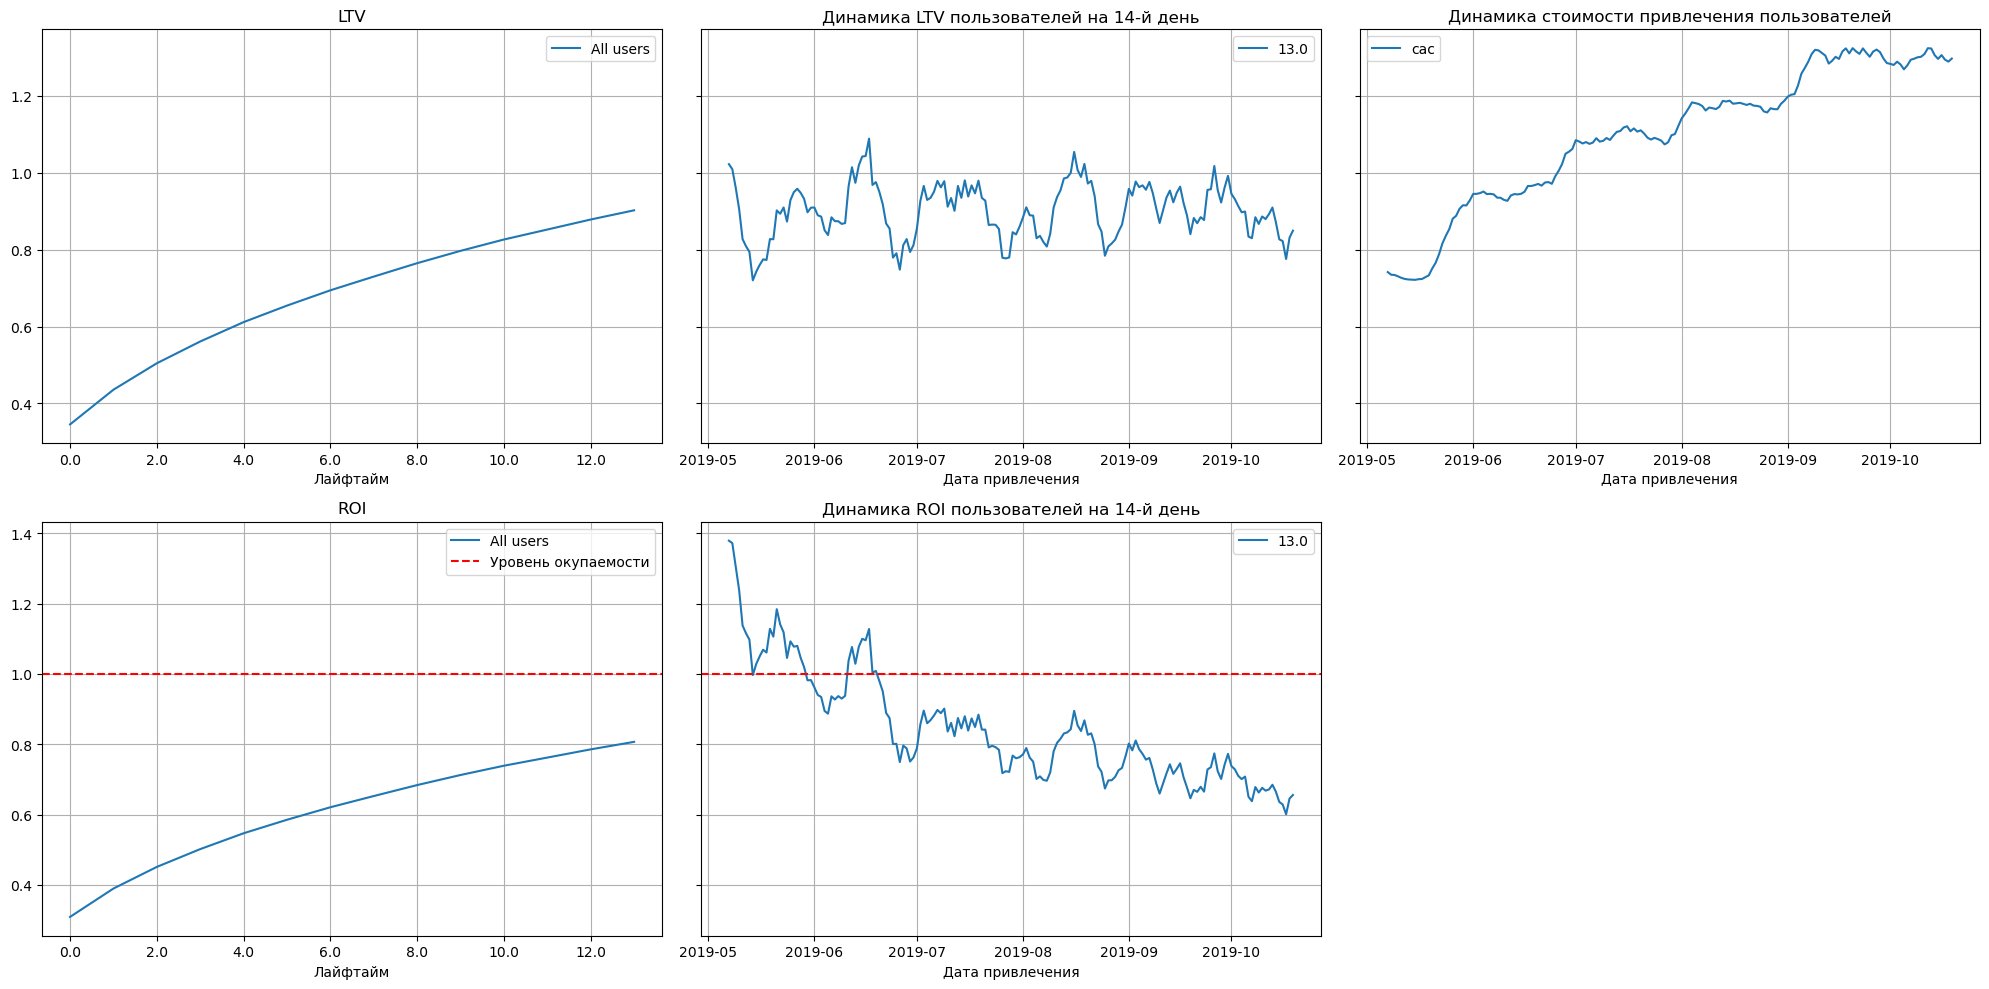

In [313]:
plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon_days)

**Вывод:** 
- Реклама не окупается, ROI к 14 дню всего лишь немного превышает 80%
- САС не стабилен, стоимость привлечения пользователя все выше и выше, денег в рекламу вкладывается все больше.
- ROI пользователей на 14-й день с мая падает, к июню опускается ниже 100%, затем все же вложения окупаются, но с конца июля до момента анализа становится все ниже и ниже. 
- На LTV влияет сезонный фактор, однако показатель довольно стабильный.

Выходит, что ROI упал из-за увеличения вложений в рекламу.

### Конверсия и удержание пользователей 

Рассчитаем и построим график конверсии и динамики ее изменения:

In [317]:
conversion_raw, conversion, conversion_history = get_conversion(
    new_profiles, orders, observation_date, horizon_days)                                                            

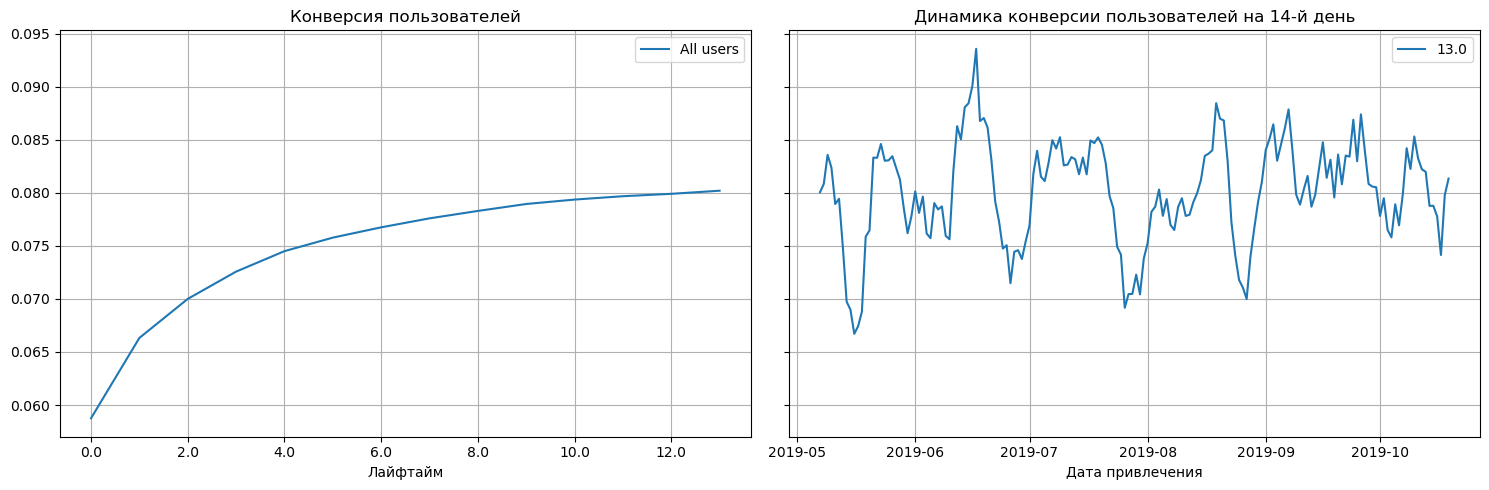

In [318]:
plot_conversion(conversion, conversion_history, horizon_days)

**Вывод:** Конверсия стабильно хороша, достигает 8%, что является хорошим показателем. Но данная характеристика тоже сезонна, ее динамика на 14-й день достигла нижнего пика в мае, но в целом являлась довольно стабильной.

Посмотрим теперь на удержание пользователей и динамику его изменения:

In [321]:
retention_raw, retention, retention_history = get_retention(
    new_profiles, visits, observation_date, horizon_days)

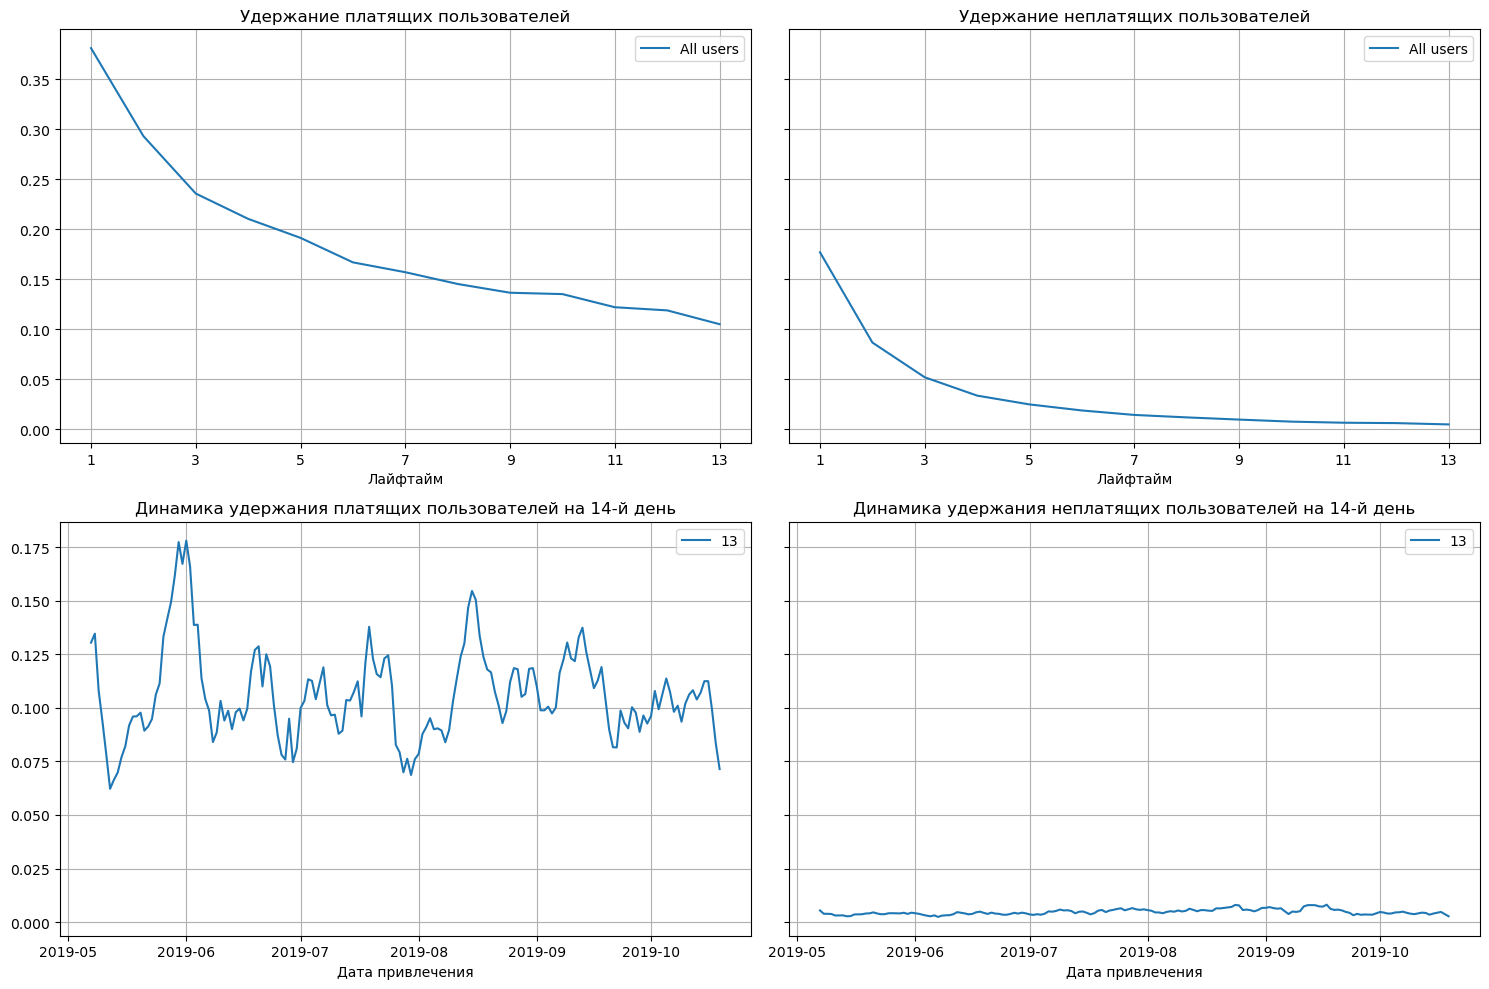

In [322]:
plot_retention(retention, retention_history, horizon_days)

**Вывод:** Удержание платящих пользователей хромает, эта характеристика уверенно падает с 40% до 10% в течение горизонта анализа, а 10% - крайне низкий показатель. Динамика удержания в целом постоянна. Что касается неплатящих пользователей, их удержание стремится к 0 на 14-й день, что явно видно на графике динамики удержания неплатящих пользователей - она стабильно находится почти в нуле. Возможно, основные проблемы компании связаны именно с этим - что-то не так с неплатящими пользователями, возможно, техническая ошибка.

### Окупаемость рекламы с разбивкой по устройствам

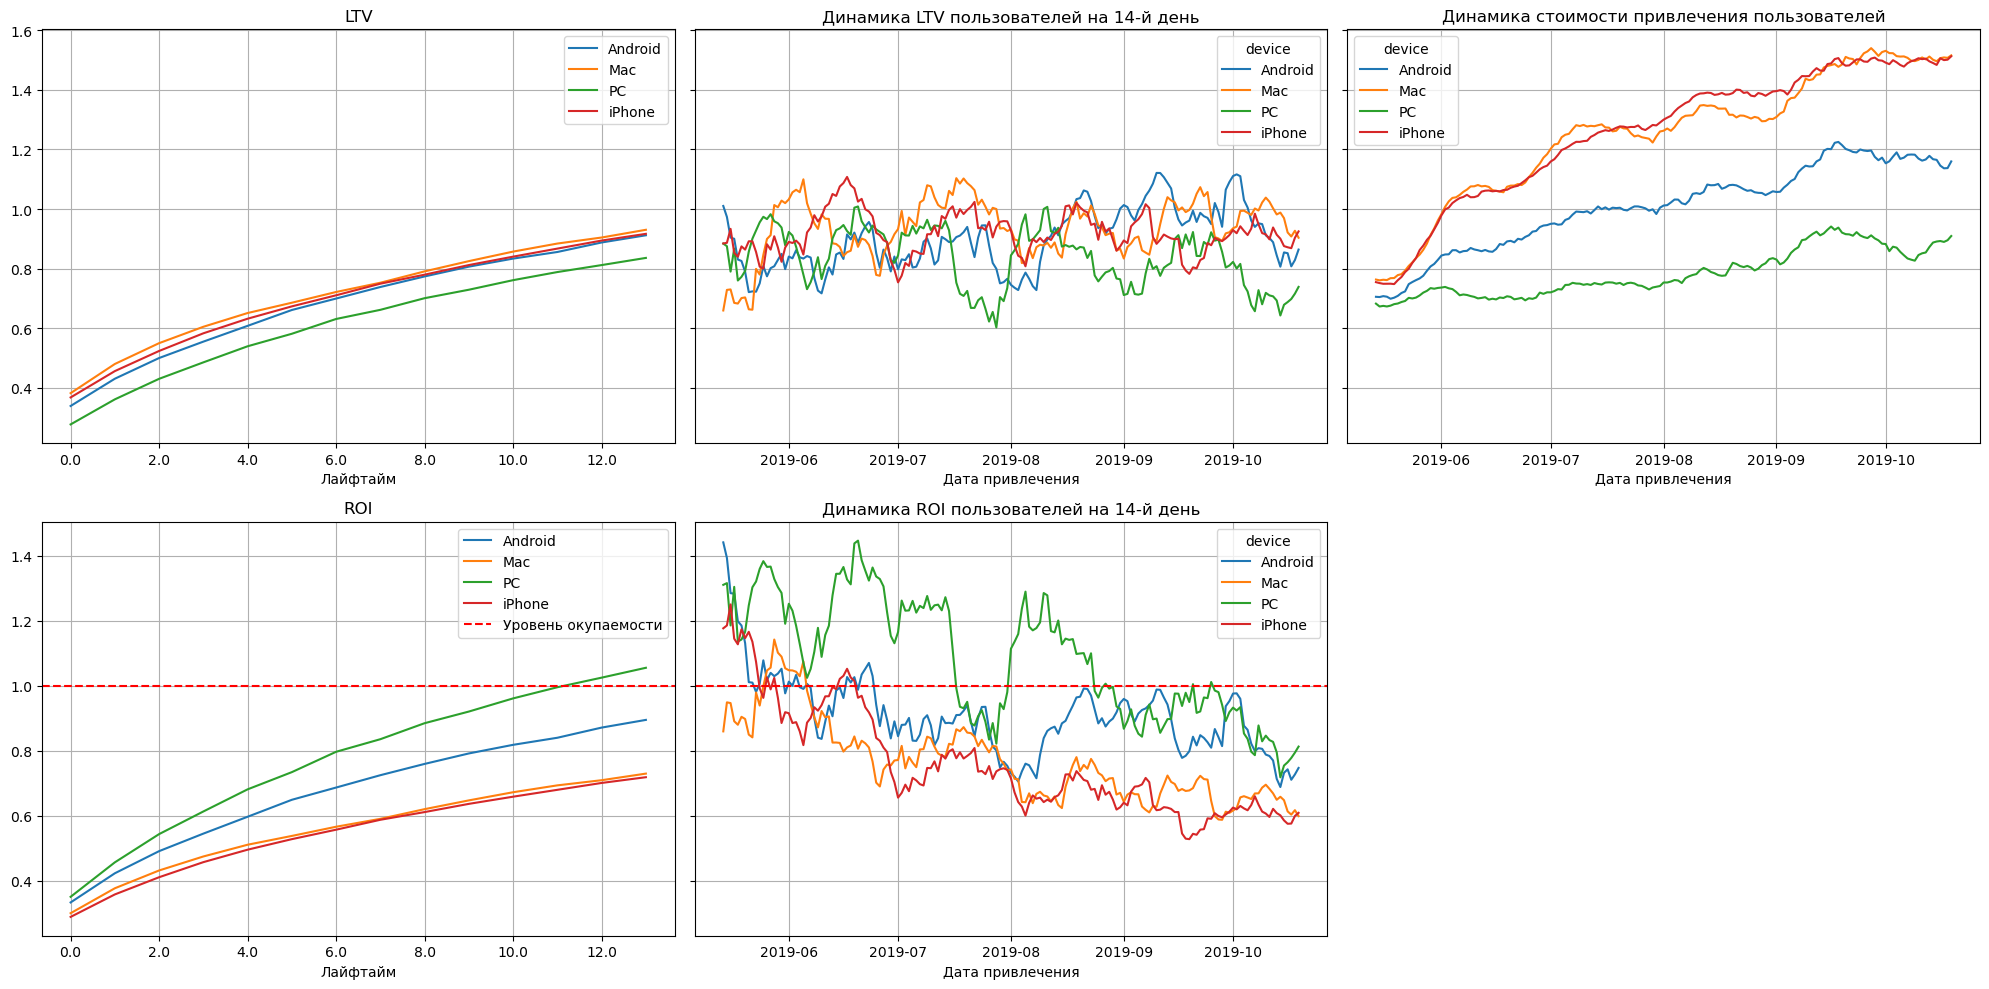

In [325]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    new_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:** 
- LTV пользователей `PC` ниже других, а окупаются они лучше всего, но вот пользователи `Mac`, `IPhone` и `Android` не окупаются вообще. 
- САС растет для всех с течением времени, наибольшие вложения идут в пользователей `IPhone` и `Mac`. 
- Динамика ROI ан 14-й день с сентября не окупается ни для каких пользователей, в мае, июне, июле и августе окупается только для `PC`, в июне и июле периодически окупается для всех пользователей.


Выходит, что основные проблемы связаны с пользователями `Mac` и `IPhone`, стоимость их привлечения  самая высокая, а вот окупаемость наоборот - самая низкая, а с сентября уже крайне мала.
Также, стоит обратить внимание на то, что кривая LTV почти одинакова для всех устройств, а вот вложения в рекламу растут, и сильнее всего растут именно у `Mac` и `IPhone`.

### Окупаемость рекламы с разбивкой по странам

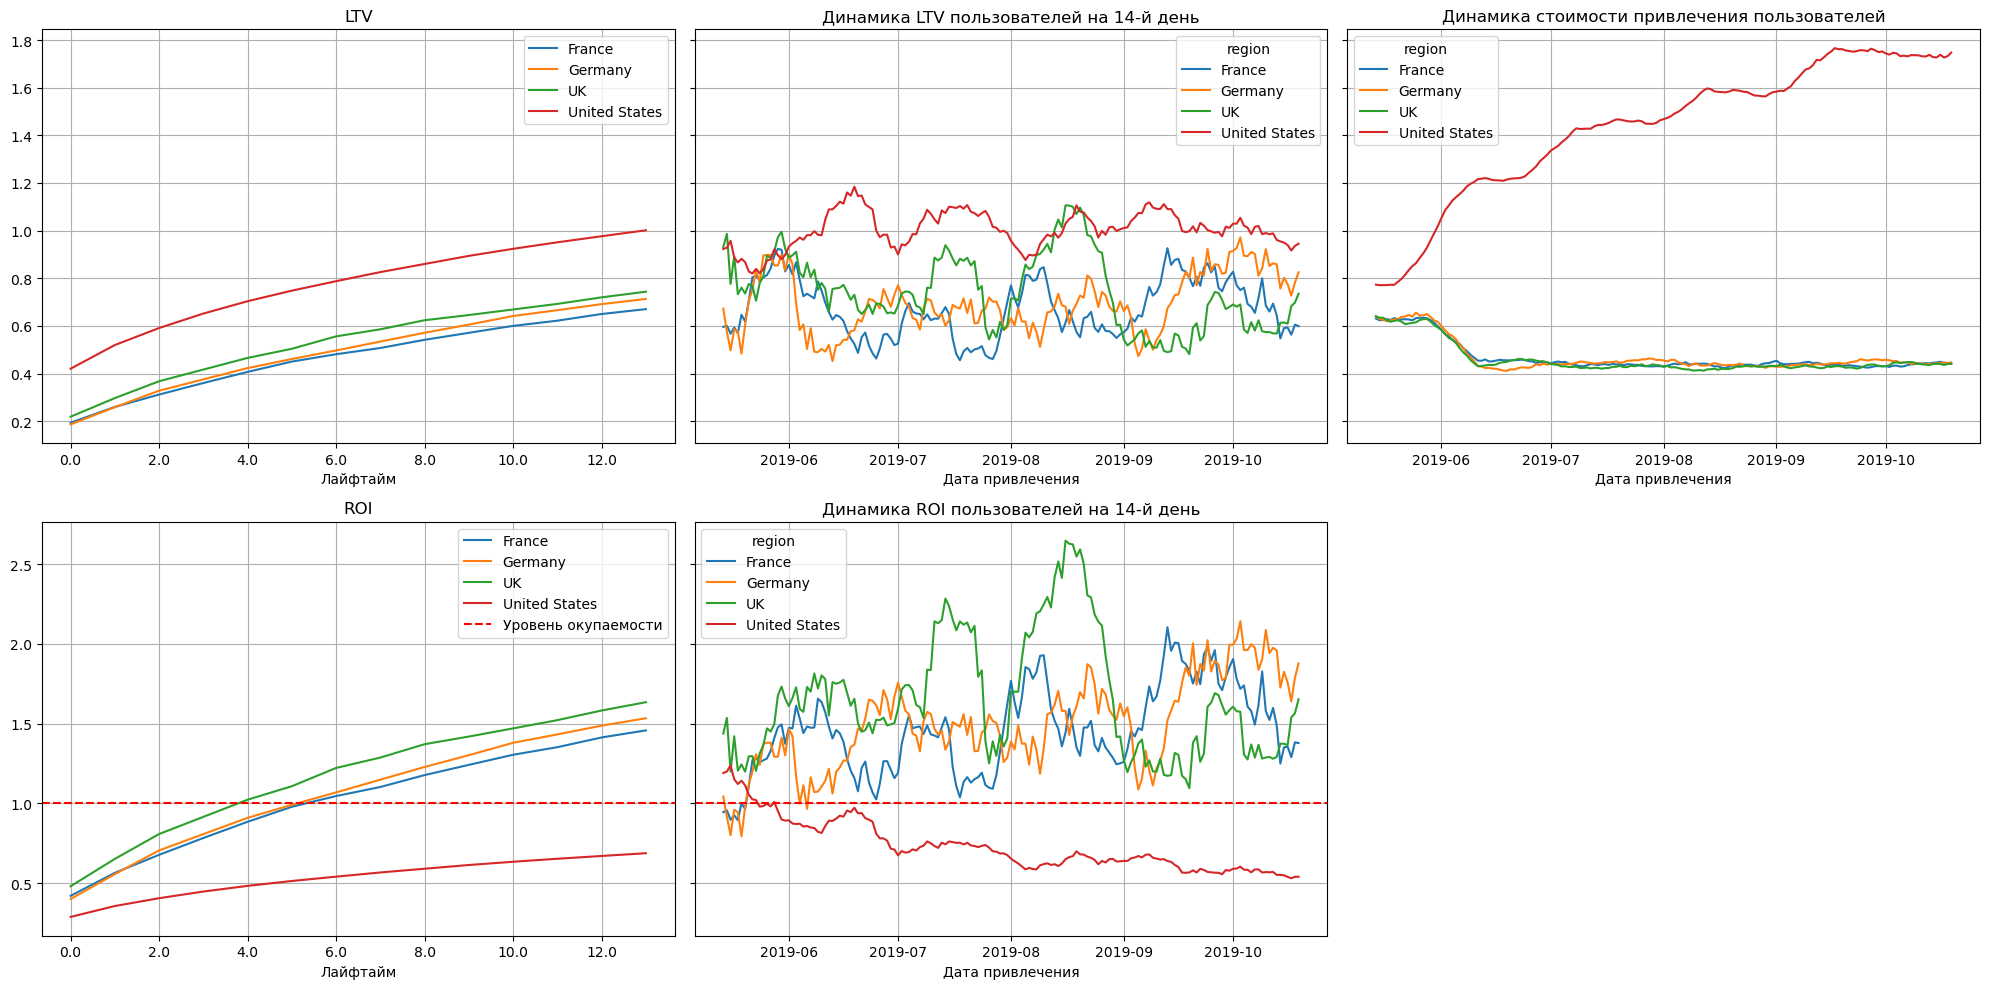

In [328]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    new_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:** 
- LTV Франции ниже всех на 14-й день, а вот в США пожизненная ценность клиента в 1.5-2 раза выше, чем у пользователей из других стран.
- Стоимость привлечения пользователей сильно не стабильна, пользователи США все дороже с каждым месяцем, а вот стоимость привлечения пользователей остальных стран с июня по конец исследуемого периода стабильно низкая.
- Клиенты США не окупаются в отличие от остальных.
- Динамика ROI на 14-й день зависит от месяца, но вот в США она убывающая, был пик в середине июня, затем почти стабильно окупаемость пользователей на 14-й день падала. Видимо САС растет сильнее, чем LTV, вложения не оправдываются.

У США самый высокий LTV, и это единственная неокупающаяся страна, значит, дело в стабильно растущем САС.

Посмотрим, есть ли связь окупаемости в разбивке по странам с устройствами. Посмотрим на графики LTV, ROI и CAC устройств отдельно для США и для Европы:

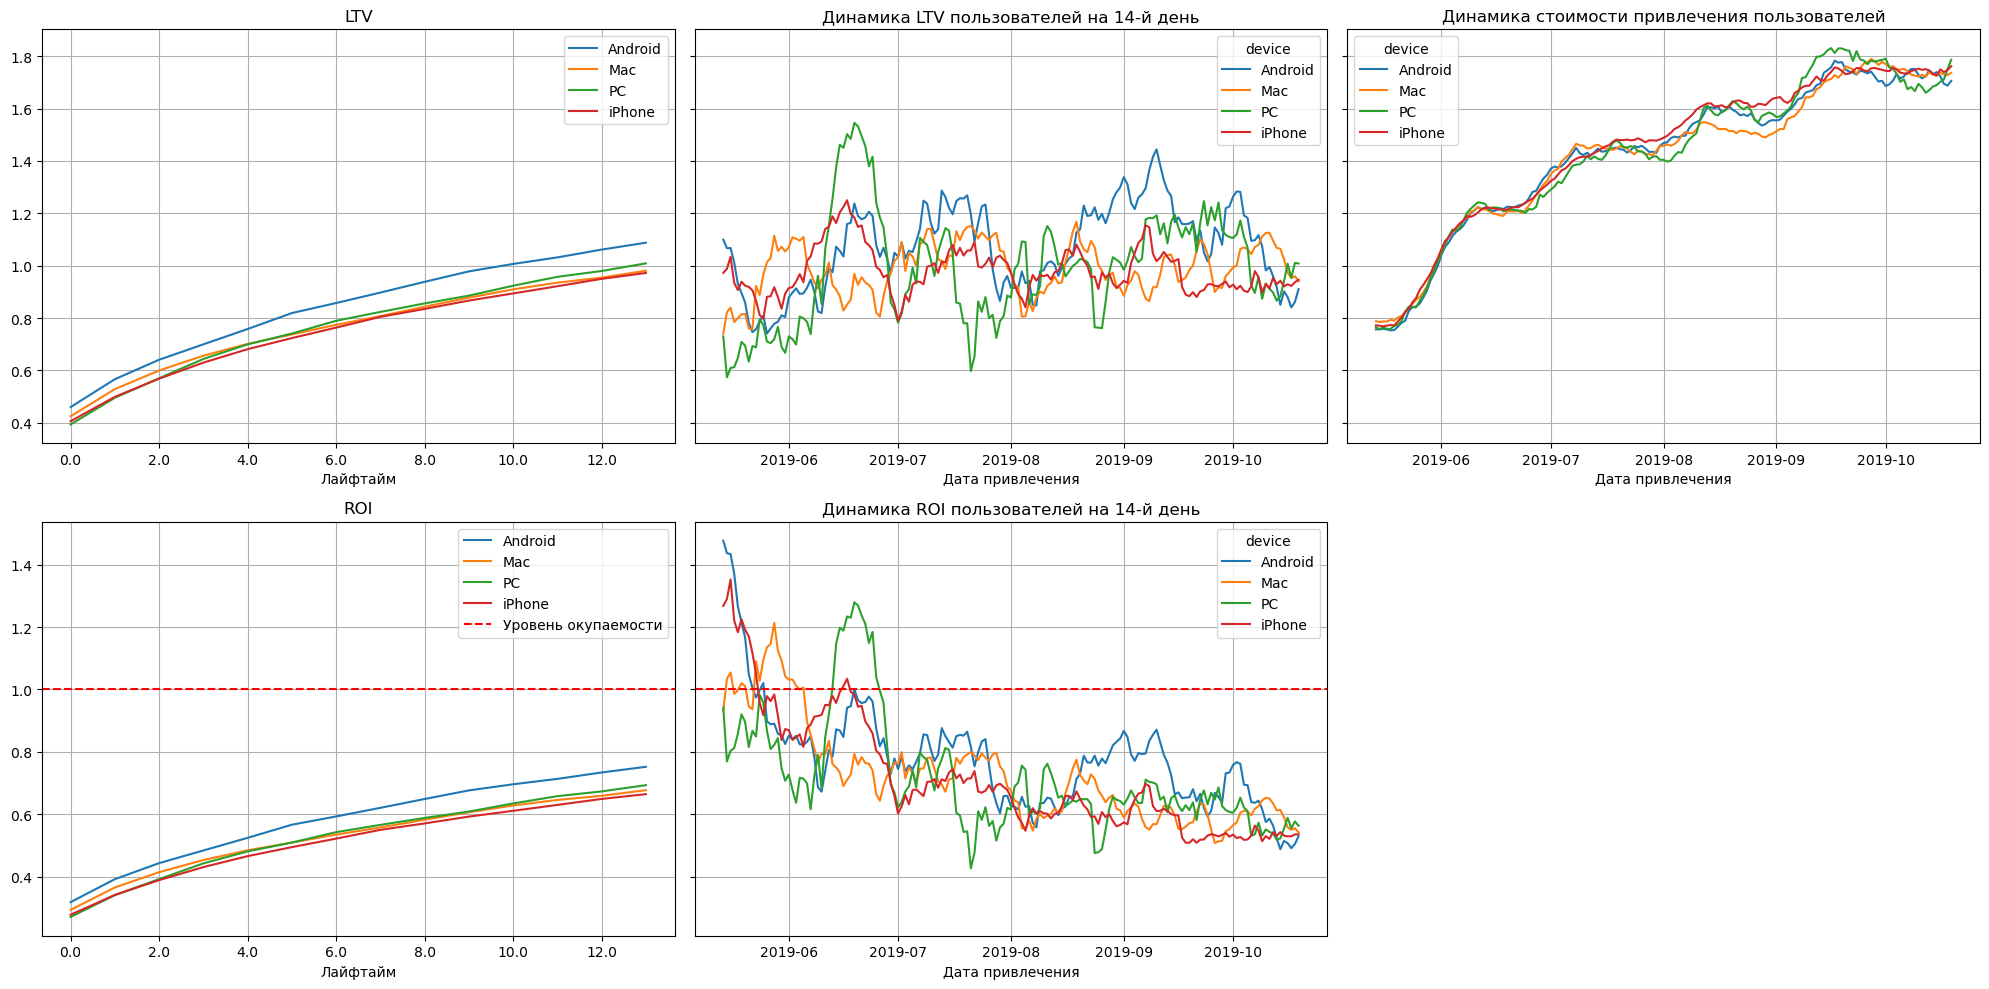

In [404]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    new_profiles.query('region == "United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

C LTV все хорошо, он примерно одинаков для пользователей всех устройств США, андроид чуть выше других. А вот ROI страдает, не окупается ничего. В мае и июне все было еще не плохо, но с июля окупаемость прропала окончательно и все убывает, дело наверняка в растущем САС. 

Посмотрим теперь на Европу:

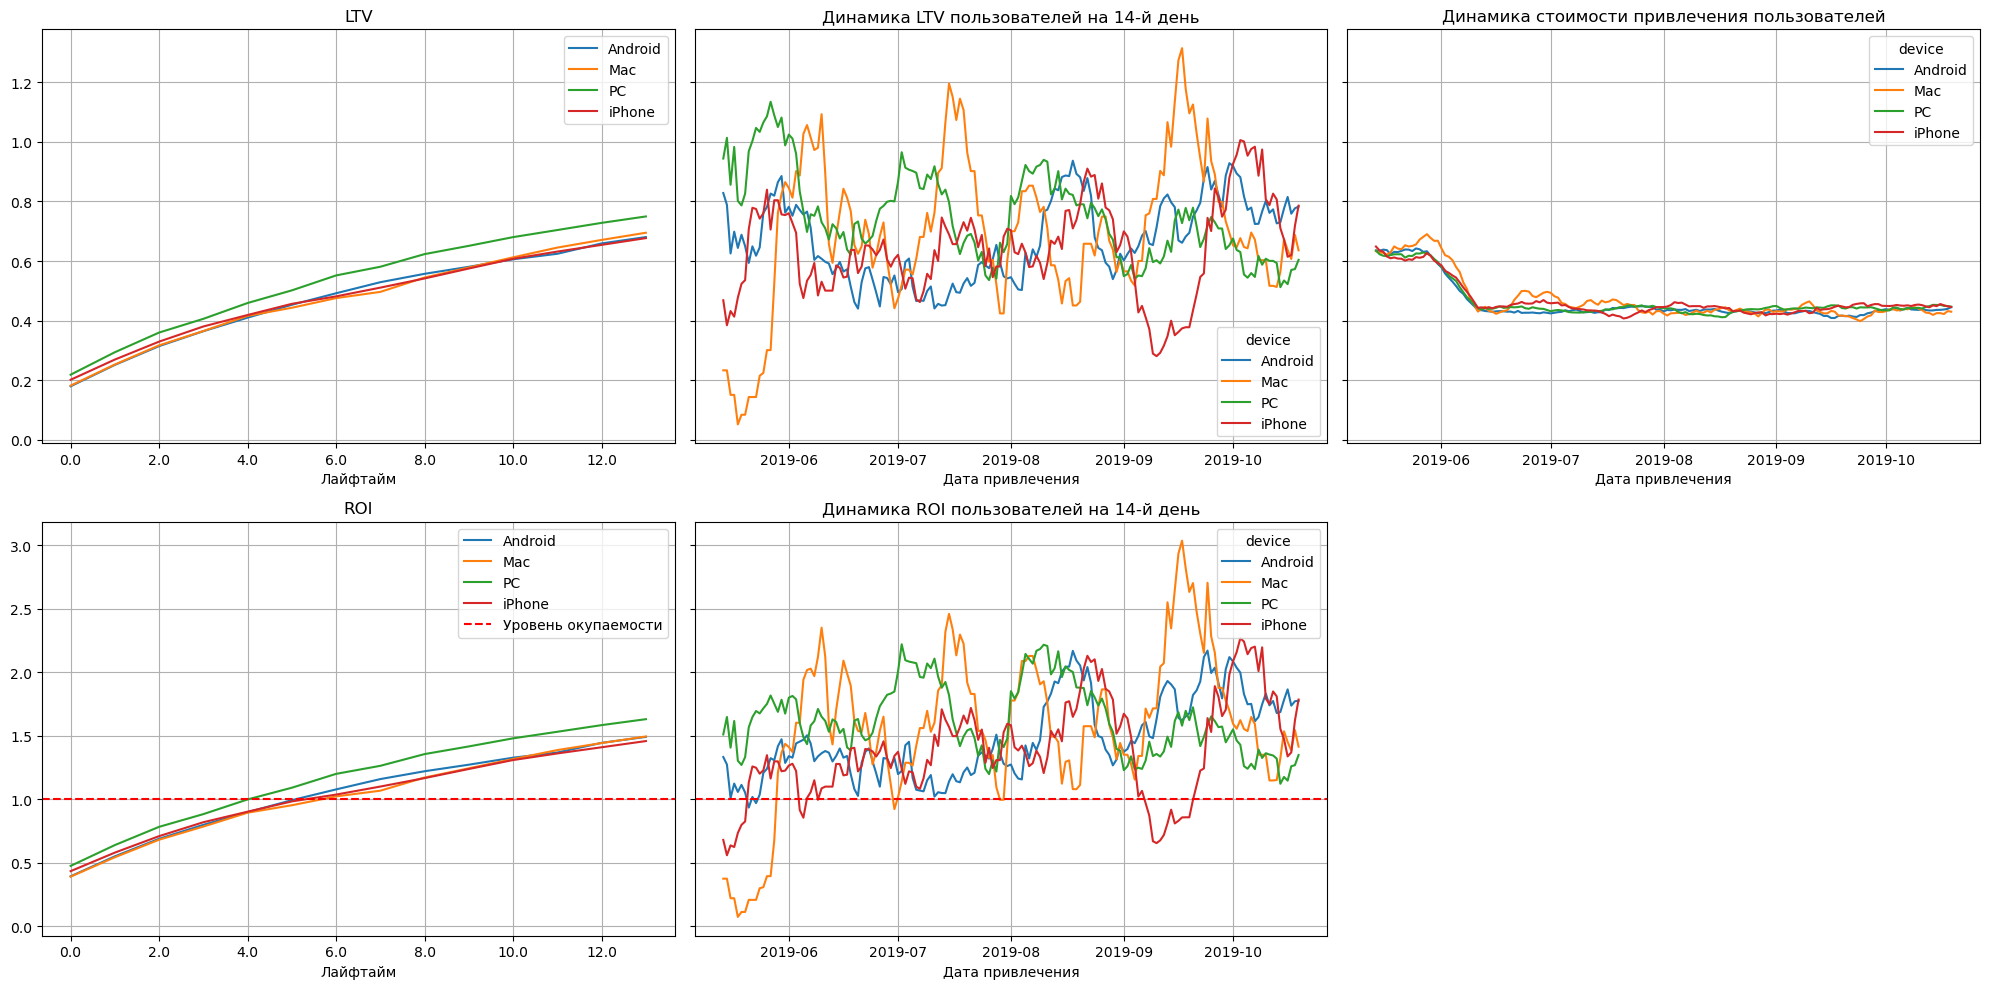

In [407]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    new_profiles.query('region != "United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Ого! Окупаются даже пользователи `Mac` и `IPhone`. Видимо причина неокупаемости пользователей на этих устройствах лежала в США в растущем САС, учитывая, что в этой стране 100000 пользователей, ее проблемы повлияли на общую статистику.

### Окупаемость рекламы с разбивкой по рекламным каналам

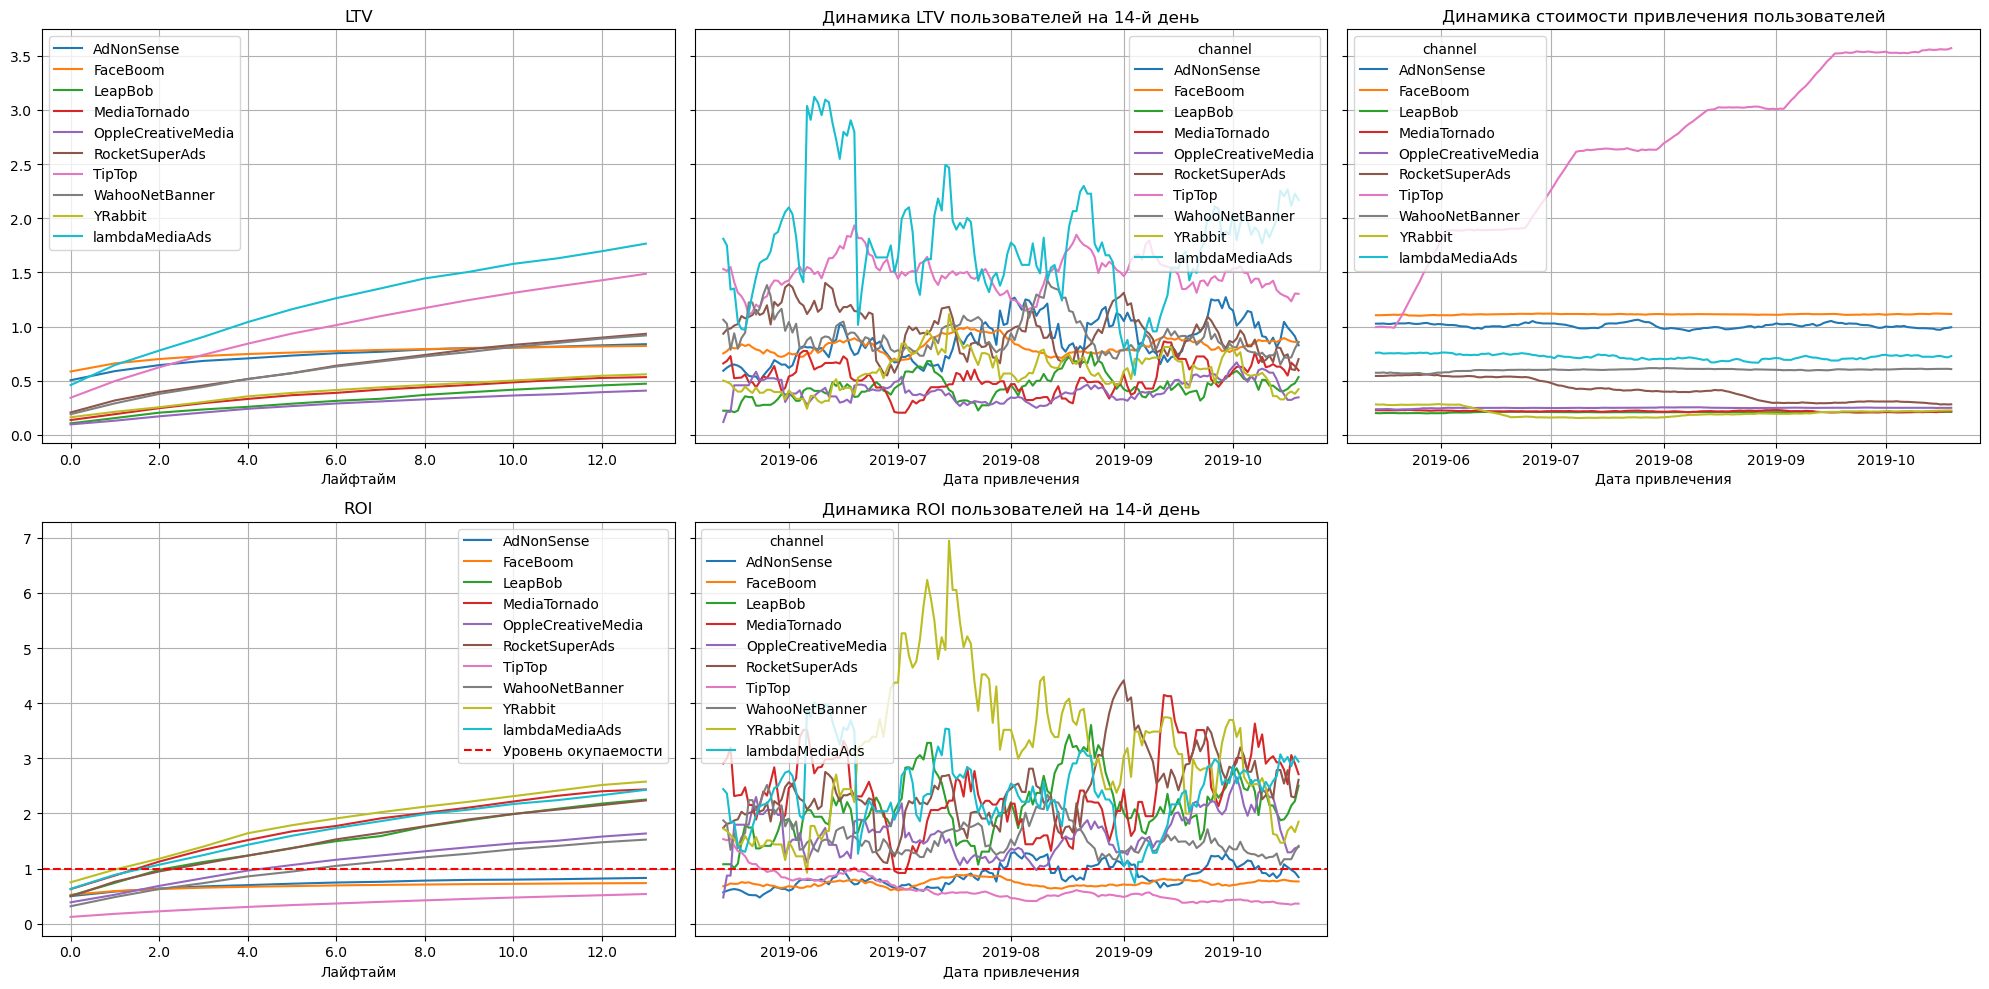

In [331]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    new_profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:** 
- LTV `lambdaMediaAds` и `TipTop` лидируют, с каждым днем до 14 растут примерно с одинаковой интенсивностью, а вот у `FaceBoom` и `AdNonSense` этот показатель практически стабилен, к 14-у дню некоторые компании даже обгоняют их. Пожизенная ценность пользователей, привлеченных по другим каналам, ниже.
- Динамика LTV почти стабильна по месяцам, выделяется `lambdaMediaAds`, у которой нижние и верхние пики очень зависят от сезона, перепады значений велики.
- САС `TipTop` - единственный, чей график указывает на растущую динамику, причем с июля к сентябрю она выросла аж в 3.5 раза. Динамика `RocketSuperAds` указывает на уменьшение стоимости привлечения пользователей, у остальных компаний показатель стабилен.
- К 14-у дню не окупаются три рекламные компании - `TipTop`, `AdNonSense` и `FaceBoom`. 
- Динамика ROI на 14-й день самая стабильная именно для тех трех компаний, что не окупаются. В `YRabbit` случился пик в середине июля, затем график схож на графики остальных компаний, в среднем практически стабилен, но потихоньку убывает.

`TipTop` не окупается из-за растущей стоимости привлечения, а вот в чем причина неокупаемости `FaceBoom` и `AdNonSense` - пока не ясно, САС у них стабильный, а вложения не оправдывались с самого начала - с мая.

Давайте попробуем разобраться, в чем причина проблем с `FaceBoom` и `AdNonSense`, исследуем конверсию и удержание:

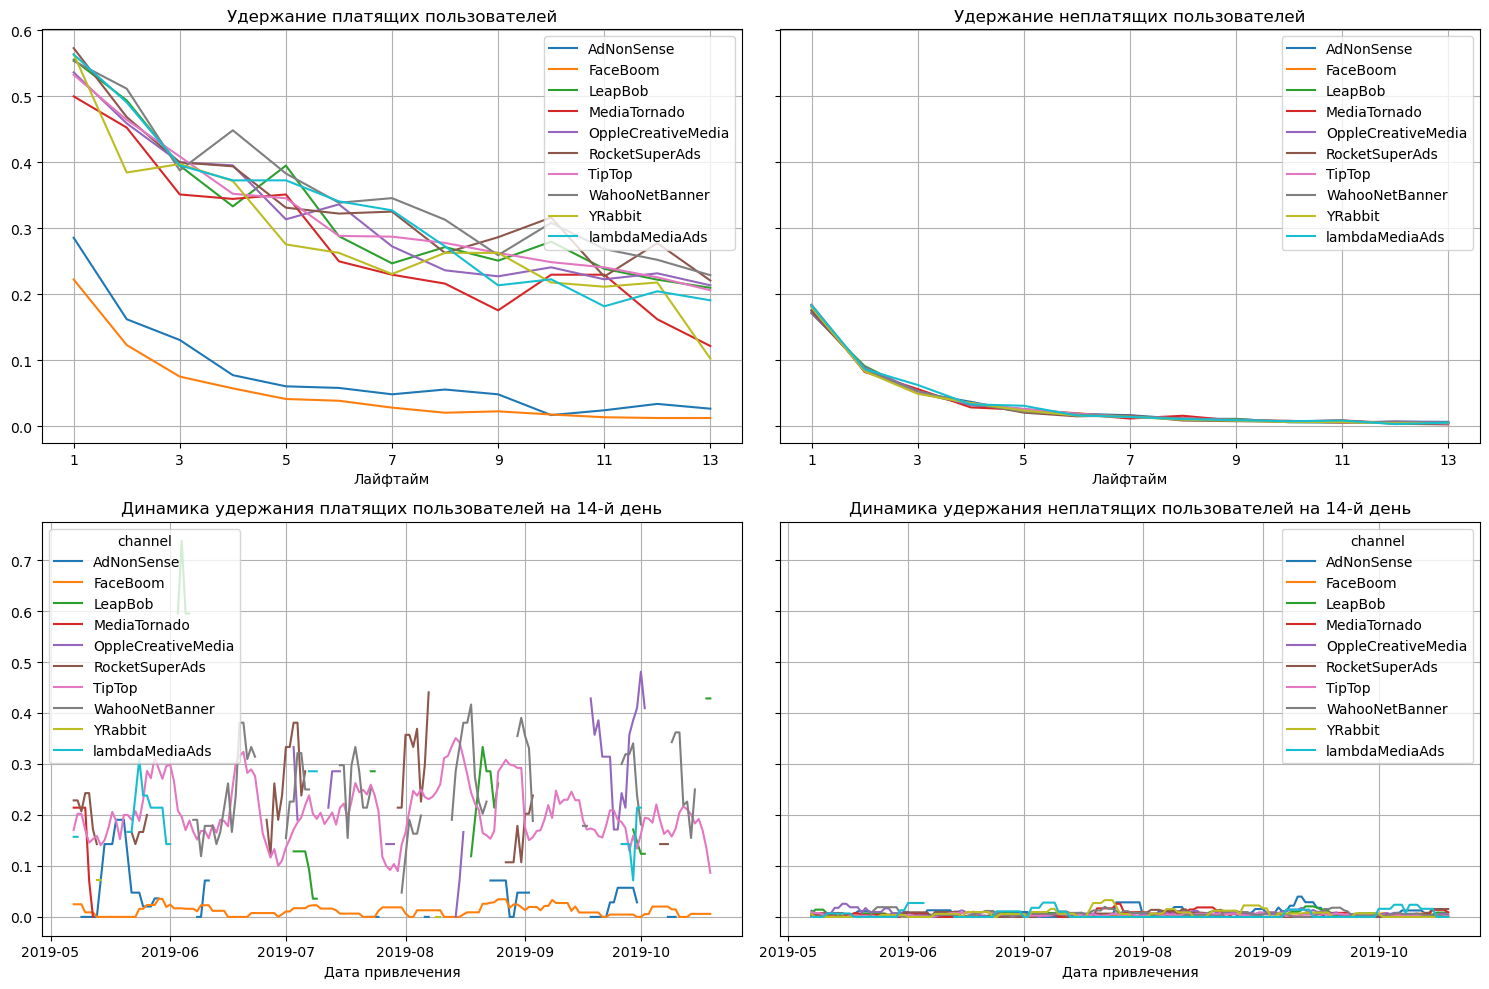

In [393]:
dimensions = ['channel']

retention_channel_raw, retention_channel, retention_channel_history = get_retention(
    new_profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_channel, retention_channel_history, horizon_days)

Теперь ясно, удержание платящих пользователей, привлеченных `FaceBoom` и `AdNonSense`, все время ниже других компаний примерно на 30%, к 14-у дню стремится к нулю. Видимо реклама этих двух компаний вводит пользователей в заблуждение, а может, дело в технической ошибке.

Удержание неплатящих пользователей совсем страдает, уже к 7 дню находится почти в нуле, а к 14 дню четкий ноль.

Исследуем конверсию:

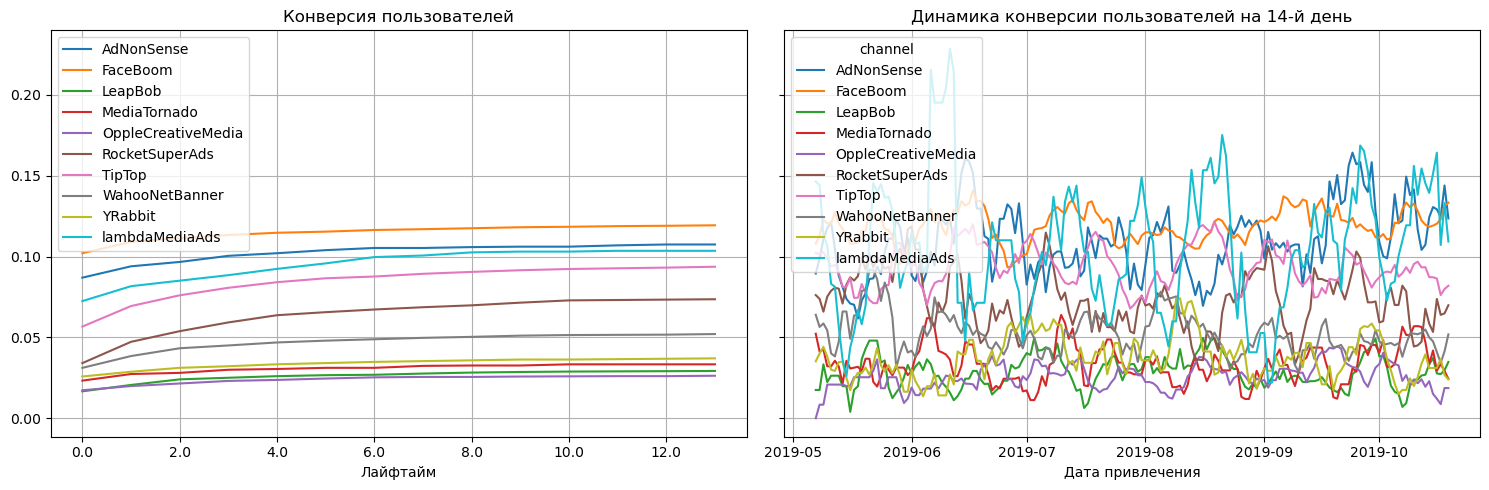

In [400]:
dimensions = ['channel']

conversion_channel_raw, conversion_channel, conversion_channel_history = get_conversion(
    new_profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_channel, conversion_channel_history, horizon_days)

Судя по графикам, пользователи `FaceBoom` и `AdNonSense` конвертируются лучше остальных компаний, к тому же, стабильно. Значит, дело действительно в удержании.

Посмотрим, как распределен бюджет рекламных каналов по странам:

In [411]:
new_profiles.pivot_table(index='region', columns='channel', values='acquisition_cost', aggfunc='sum')

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
region,,,,,,,,,,
France,1376.316788,NaN,628.045578,NaN,747.336327,NaN,NaN,1789.137006,NaN,535.138248
Germany,1229.282545,NaN,529.946557,NaN,640.733464,NaN,NaN,1552.972718,NaN,471.287952
UK,1305.650668,NaN,639.607864,NaN,763.180209,NaN,NaN,1808.890277,NaN,551.173800
United States,NaN,32445.6,NaN,954.48,NaN,1833.0,54751.3,NaN,944.22,NaN


Получается, весь бюджет, выделенный на `FaceBoom`, уходит в пользователей США. Конверсия пользователей, привлеченных `FaceBoom`, отличная, удержание пплохое, и США единственная неокупающаяся страна, а денег в компанию вкладывают безумно много, как и в `TipTop`. Расходы однозначно надо уменьшить. 

`AdNonSense` наоборот привлекает пользователей в Европе. Вложения почти окупаются, следует лишь немного их приуменьшить, чтобы не было убытков.

### Окупается ли реклама, направленная на привлечение пользователей в целом?

В целом, не окупается, но близится к этому, ROI равен 80 процентам, однако стоит обратить внимание на динамику окупаемости в 14-й день по сезонам - этот показатель лишь падает к сентябрю.

### Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

Причиной неокупаемости рекламы могут являться пользователи `Mac` и `IPhone`, стоимость их привлечения растет, а окупаемость падает, к тому же, пользователи этих устройств занимают большую часть. Но, как мы выяснили, в Европе такие пользователи окупаются, а значит дело именно в регионе - в США, в которую выкладывают чересчур большие деньги, LTV в порядке, а вот САС завышен.


`TipTop`, `AdNonSense` и `FaceBoom` - рекламные компании, вложения в которые не оправдались. 
`TipTop` и `FaceBoom` - рекламные компании США, деньги в них были вложены чересчур большие, потому они и не окупились. С `AdNonSense` ситуация похожая, но рекламные кампании проводились в Европе, периодически вложения окупались, причем ровно в те периоды, когда САС немного рос, а значит, не следует увеличивать вложения, имеет смысл слегка их приуменьшить.

### Чем могут быть вызваны проблемы окупаемости?

Судя по графикам, корни проблем лежат в неоправданных вложениях - чем больше становится стоимость привлечения пользователей, тем выше риск, что они не окупятся. В `FaceBoom` вложили невероятно большое количество денег, больше, чем суммарно по всем каналам Европы, такие вложения физически не смогли окупиться, аналогично с `TipTop`, вложения в которую только растут с течением времени. `AdNonSense` вообще периодически окупался к 14-у дню, так что финансы, направленные туда, лишь немного превысили ту идеальную середину. 

## Вывод

Мы проанализировали данные по пользователям приложения Procrastinate Pro+ из 4 стран - США, Германии, Франции и Великобритании, и попытались выявить причины отсутствия эффективности привлечения пользователей. Мы выяснили, что вложения в рекламные кампании растут, а вот окупаемость падает.

1. Реклама не окупается для пользователей всех устройств с сентября, особо проблемными являются `Mac` и `IPhone` - вложения в них самые большие, а вот ROI наоборот самый маленький, но проблема кроется не в устройствах, а в странах, конкретно в США, в которой просто пользователей больше, а соедовательно и пользователей `Mac` и `IPhone` больше.



2. Пользователей в США крайне большое количество (100к человек), видимо по этой причине было принято решение вкладываться в их привлечение как можно больше, однако именно пользователи из этой страны портят общую картину окупаемости. Они единственные, кто не окупается совсем.
- Следует просто уменьшить вложения, тогда доля платящих пользователей все равно будет в порядке, а в рекламу не будут вкладываться лишние деньги. В `TipTop` и `FaceBoom` было вложено рекордное количество денег, что и повлияло на окупаемость всех потраченных финансов. Расходы на эти каналы стоит уменьшить в разы, а направить сэкономленные деньги можно в `YRabbit` и `MediaTornado`, и не сбавлять обороты с `RocketSuperAds`. Все эти компании имеют хорошие показатели удержания, `RocketSuperAds` отличную конверсию, а `YRabbit` большую долю платящих пользователей.


- В Европе с окупаемостью все и без того отлично, следует немного уменьшить расходы на `AdNonSense`, чтобы стабилизировать окупаемость этого канала, а для привлечения новых пользователей отличным решением будет вложиться в `lambdaMediaAds`, компания обладает высокой долей латящих пользователей, отличной конверсией и удержанием.